

# **TUGAS MATA KULIAH KECERDASAN BUATAN**

---
Tim Terserah
1.   Haning Jihan Pertiwi (19/439813/TK/48543)
2.   Rahma Maesarah       (19/439820/TK/48550)
3.   Saskia Dwi Ulfah     (19/439822/TK/48552)






**IMPORT LIBRARY** 

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

**MEMBUAT KONEKSI KE GOOGLE DRIVE**

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




> **A. MODELLING**



**MENDEFINISIKAN MODEL GAUSSIAN NAIVE BAYES**

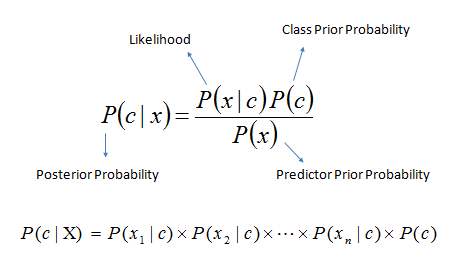

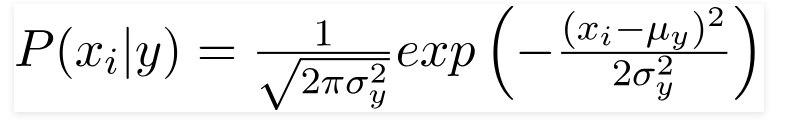








In [ ]:
class GaussianNaiveBayesClassifier():

  '''
  P(y|X) = P(X|y) * P(y)/P(X)
  '''

  def priors_calculation(self, X, y):

    '''
    Prior = P(y)
    Merupakan probabilitas dari masing-masing spesies yang ada. 
    Dalam hal ini, perhitungan prior akan menentukan probabilitas spesies
    Setosa, Versicolor dan, Virginica. 
    '''

    self.priors = (X.groupby(y).apply(lambda x: len(x))/self.X_length).to_numpy()
    self.priors_log = np.log(self.priors)

    return self.priors_log
  
  def likelihoods_calculation(self, x, index):

    '''
    Likelihood = P(X|y).
    '''

    likelihood = (np.exp((-1/2)*((x-self.features_mean[index])**2) / (2 * self.features_var[index])))/(np.sqrt(2 * math.pi * self.features_var[index]))
    likelihood_log = np.log(likelihood)

    return likelihood_log    

  def posteriors_calculation(self, x):

    '''
    Posterior = P(y|X).
    Perhitungan probabilitas posterior dilakukan untuk semua kemungkinan spesies.
    '''

    posteriors_log = []

    for i in range(self.num_of_species):
      prior_log = self.priors_log[i]
      likelihood_log = np.sum(self.likelihoods_calculation(x, i))
      posterior_log = prior_log + likelihood_log

      posteriors_log.append(posterior_log)  

    position = np.argmax(posteriors_log)

    if position == 0:
      return 'Iris-setosa'
    elif position == 1:
      return 'Iris-versicolor'
    elif position == 2:
      return 'Iris-virginica'

  def fit(self, X, y):

    '''
    Method fit digunakan untuk melatih model
    '''
    self.species = np.unique(y)
    self.X_length = len(X)
    self.num_of_species = len(np.unique(y))

    self.features_mean = X.groupby(y).apply(np.mean).to_numpy()
    self.features_var = X.groupby(y).apply(np.var).to_numpy()

    self.priors_calculation(X,y)

  def predict(self, X):

    '''
    Method predict digunakan untuk memprediksi masukan baru
    '''
    y_predict = [self.posteriors_calculation(x) for x in X.to_numpy()]
    
    return y_predict

  def score(self, y_true, y_predict):
    accuracy = np.sum(y_true == y_predict) / len(y_true)
    return accuracy

**MENDEFINISIKAN FUNGSI UNTUK MEMBAGI DATASET MENJADI BEBERAPA BAGIAN**

In [ ]:
def kfold_dataset_split(dataset, folds):

  '''
    Method ini digunakan untuk membagi dataset sebanyak folds yang didefinisikan.
    Pembagian dilakukan setelah dataset diacak sedemikian rupa.
  '''
  
  dataset_split = []
  df_copy = dataset
  fold_size = int(df_copy.shape[0] / folds)
        
  for i in range(folds):
    fold = []
           
    while len(fold) < fold_size:
      r = random.randrange(df_copy.shape[0])
      index = df_copy.index[r]
      fold.append(df_copy.loc[index].values.tolist())
      df_copy = df_copy.drop(index)
            # save the fold     
    dataset_split.append((fold))
          
  return dataset_split

**MENDEFINISIKAN FUNGSI CROSS VALIDATION**

In [ ]:
def cross_validation_score(estimator, dataset, k=5):

  '''
  Method ini digunakan untuk menentukan accuracy model di setiap fold. Di setiap
  fold, akan ada data berguna sebagai data train dan ada yang berguna sebagai data test.
  Accuracy di setiap fold akan ditampung dalam suatu array.
  '''

  dataset_split = kfold_dataset_split(dataset,k)

  columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
  feature = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
  target = ['Species']

  accuracy = []

  for i in range(k):
    dataset_split_copy = dataset_split.copy()
    test = dataset_split_copy[i]
    dataset_split_copy.remove(dataset_split_copy[i])

    train = []
    
    for j in range(len(dataset_split_copy)):
      train += dataset_split_copy[j]

    df_test = pd.DataFrame(test, columns=columns)
    df_train = pd.DataFrame(train, columns=columns)

    X_train, y_train = df_train[feature], df_train[target].squeeze()
    X_test, y_test = df_test[feature], df_test[target].squeeze()

    model = estimator

    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    score = model.score(y_test, y_predict)

    accuracy.append(score)

  return np.array(accuracy).T



> **B. IMPLEMENTATION**



**IMPORT DATASET**

In [ ]:
## import dataset

iris = pd.read_csv('/content/drive/Shareddrives/bisa gais/Iris.csv')

In [ ]:
## melihat 5 data teratas pada dataset

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
## informasi mengenai dataset

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**DATA PREPROCESSING**

In [ ]:
## melihat apakah ada null value

iris.isnull().any() # tidak terdapat null value

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [ ]:
## melihat apakah ada duplikasi pada data

len(iris['Id'].unique())==len(iris) # tidak terdapat duplikasi data

True

In [ ]:
## drop atribut yang tidak digunakan karena tidak berpengaruh terhadap penentuan spesies

iris = iris.drop(columns=['Id'])
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**VISUALISASI**

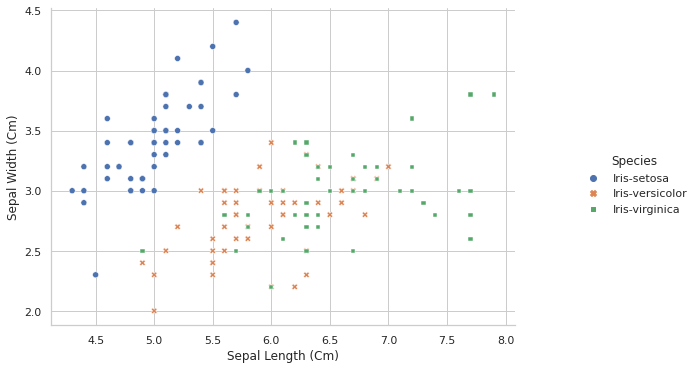

In [ ]:
## scatter plot antara atribut sepal length dan sepal width

scatter = sns.relplot(x='SepalLengthCm', y='SepalWidthCm', data=iris, hue='Species', style='Species')
scatter.fig.set_size_inches(10,5)
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Sepal Width (Cm)')
plt.show()

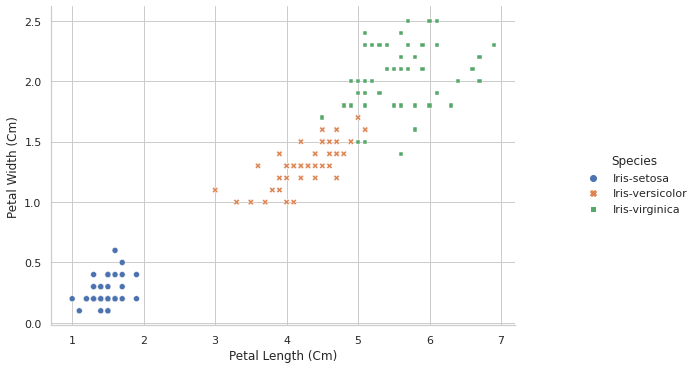

In [ ]:
## scatter plot antara atribut petal length dan petal width

scatter = sns.relplot(x='PetalLengthCm', y='PetalWidthCm', data=iris, hue='Species', style='Species')
scatter.fig.set_size_inches(10,5)
plt.xlabel('Petal Length (Cm)')
plt.ylabel('Petal Width (Cm)')
plt.show()

**IMPLEMENTASI MODEL DENGAN CROSS VALIDATION**

In [ ]:
gnb = GaussianNaiveBayesClassifier()

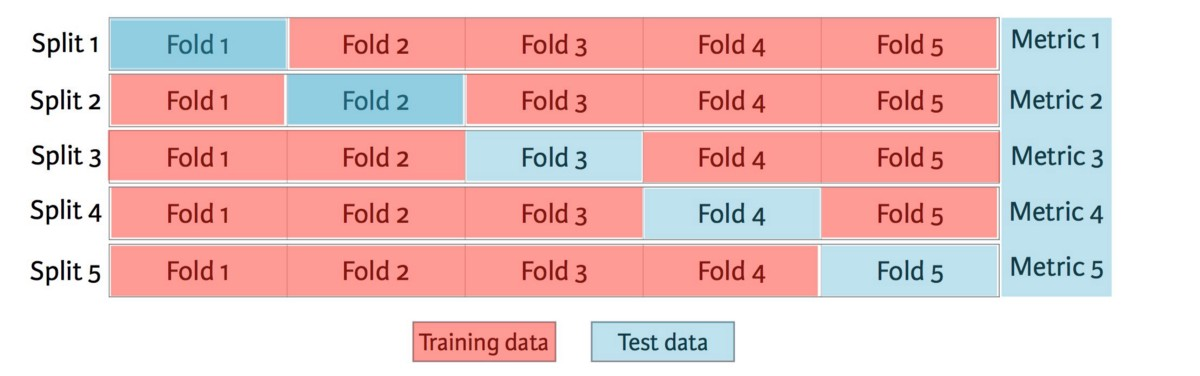

In [ ]:
score = cross_validation_score(gnb, iris, 5)

In [ ]:
score

array([0.93333333, 1.        , 0.9       , 1.        , 0.93333333])

In [ ]:
np.mean(score)

0.9533333333333334

**PERBANDINGAN DENGAN LIBRARY SKLEARN**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [ ]:
gaussianNB = GaussianNB()

In [ ]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

In [ ]:
score = cross_val_score(gaussianNB, X, y, cv = 5)

In [ ]:
score

array([0.93333333, 1.        , 0.9       , 1.        , 0.93333333])

In [ ]:
np.mean(score)

0.9533333333333334